# Region Analysis
- Aggregate and plotting sales analysis (profit, sales) in each continent, country and city
- Return analysis in each region, identify which region has the highest return rates

### Loading data

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine

# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from ContosoRetail_df"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine, index_col='SalesKey')

# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

### Inspecting data

In [2]:
df_origin

,SalesKey,DateKey,ChannelName,StoreName,ContinentName,Country,City,ProductName,ProductCategory,PromotionName,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,2022-01-02,Store,Contoso Baildon Store,Europe,United Kingdom,Baildon,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,European Holiday Promotion,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400
1,2,2022-02-12,Reseller,Contoso North America Reseller,North America,United States,Seattle,Contoso Battery charger - bike E200 Black,Computers,North America Spring Promotion,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605
2,3,2023-01-24,Store,Contoso Cambridge Store,Europe,United Kingdom,Cambridge,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,North America Spring Promotion,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500
3,4,2023-01-13,Online,Contoso Europe Online Store,Europe,Germany,Berlin,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,European Holiday Promotion,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200
4,5,2023-01-22,Online,Contoso Europe Online Store,Europe,Germany,Berlin,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,European Holiday Promotion,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2022-10-09,Store,Contoso Brooklyn Store,North America,United States,Brooklyn,SV USB Data Cable E600 Black,Computers,No Discount,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750
3406085,3406086,2022-07-08,Store,Contoso Round Rock Store,North America,United States,Round Rock,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,Cameras and camcorders,North America Back-to-School Promotion,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000
3406086,3406087,2024-03-06,Online,Contoso Asia Online Store,Asia,China,Beijing,Contoso Behind Centrex X15 White,Cell phones,Asian Spring Promotion,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830
3406087,3406088,2022-02-04,Store,Contoso Germantown Store,North America,United States,Germantown,Proseware Projector 1080p LCD86 Black,Computers,North America Spring Promotion,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750


### Sales, profit and COGs analysis

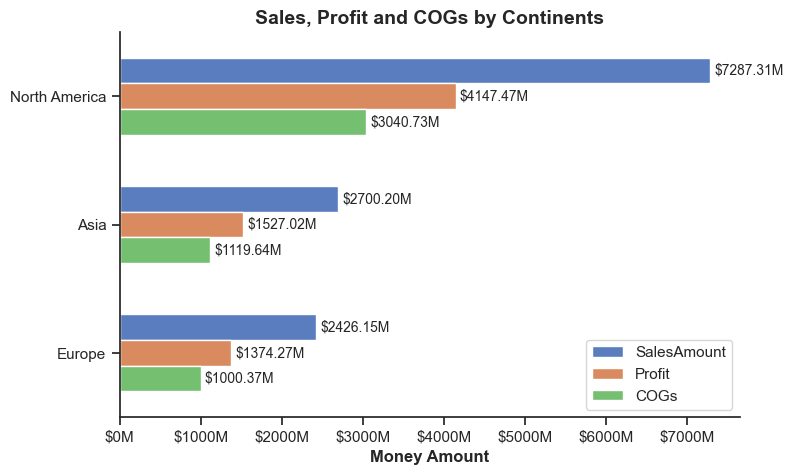

In [3]:
df_region = df_origin[['ContinentName','Country','City','SalesQuantity','DiscountAmount','TotalCost','SalesAmount']].copy()
df_region['Profit'] = df_region['SalesAmount'] - df_region['TotalCost']
df_region['COGs'] = df_region['TotalCost'] - df_region['DiscountAmount']

# Calculating Sales, Profit, COGs
df_continent = df_region.groupby('ContinentName')[['SalesAmount','Profit','COGs']].sum().reset_index().sort_values(by='SalesAmount', ascending=False)
df_continent_melted = df_continent.melt(id_vars='ContinentName', var_name='Metrics', value_name='Amount')

# Plotting
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
sns.barplot(
    data=df_continent_melted,
    x='Amount',
    y='ContinentName',
    hue='Metrics',
    palette='muted',
    width=0.6
)
sns.despine()

# Formatting plot
plt.legend(title=False)
plt.title('Sales, Profit and COGs by Continents', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xlabel('Money Amount', fontweight='bold')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))

# Labeling
for container in plt.gca().containers:
    plt.gca().bar_label(container, labels=[f'${x/1000000:.2f}M' for x in container.datavalues], padding=3, fontsize=10)

plt.show()

In [4]:
df_continent_melted

,ContinentName,Metrics,Amount
0,North America,SalesAmount,7.287306e+09
1,Asia,SalesAmount,2.700204e+09
2,Europe,SalesAmount,2.426148e+09
3,North America,Profit,4.147472e+09
4,Asia,Profit,1.527019e+09
5,Europe,Profit,1.374270e+09
6,North America,COGs,3.040734e+09
7,Asia,COGs,1.119637e+09
8,Europe,COGs,1.000369e+09


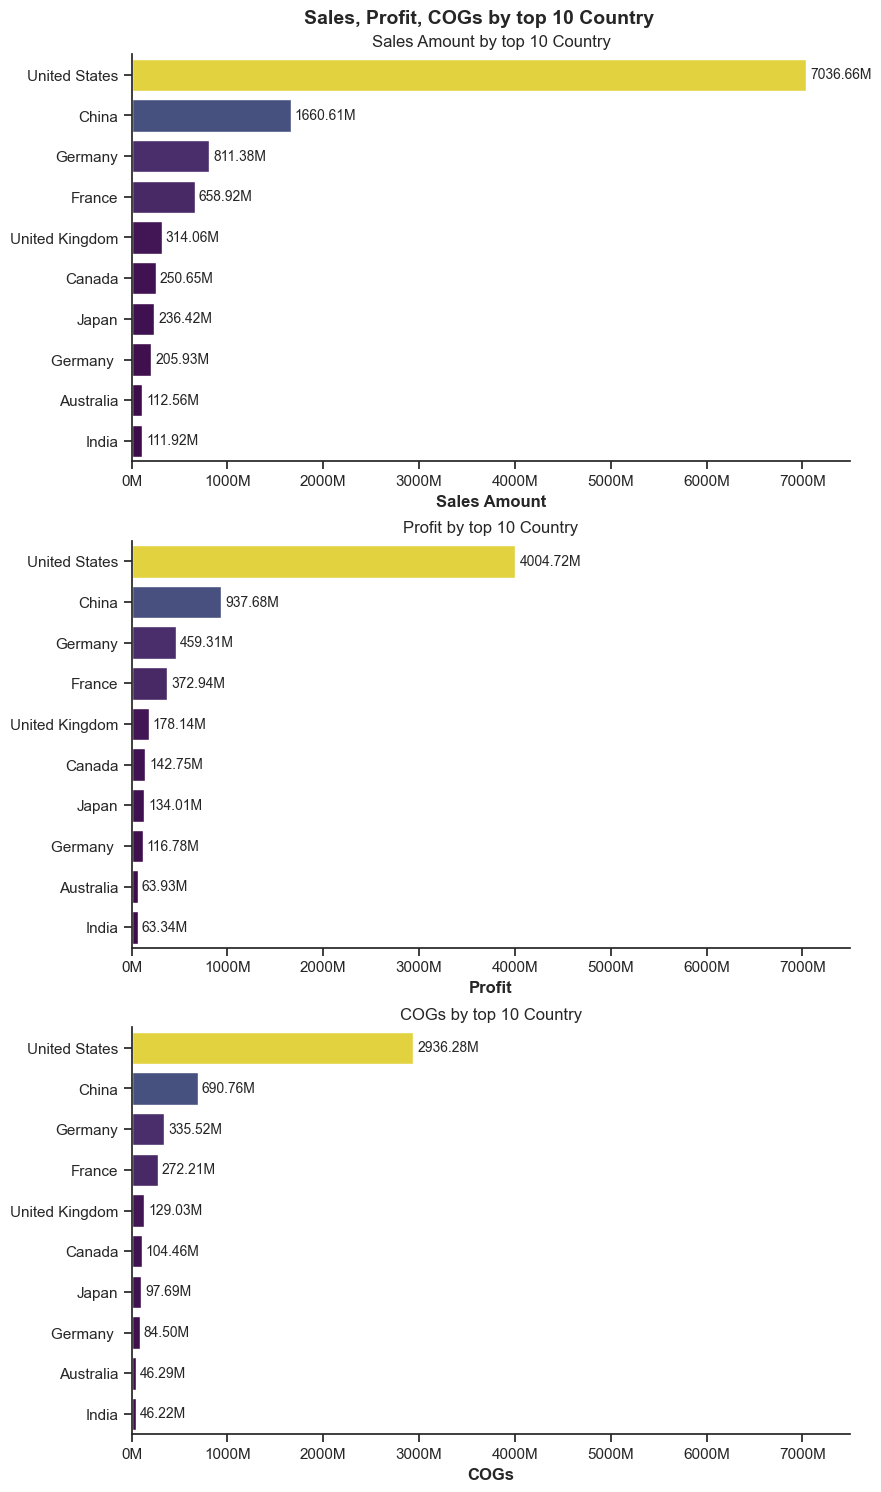

In [5]:
# Calculate Sales, Profit and COGs by Country, filter it down to top 10 in Sales, Profit and COGs
df_country_sales = df_region.groupby('Country')[['SalesAmount','Profit','COGs']].sum().reset_index().sort_values(by='SalesAmount', ascending=False).head(10)
df_country_profit = df_region.groupby('Country')[['SalesAmount','Profit','COGs']].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)
df_country_cogs = df_region.groupby('Country')[['SalesAmount','Profit','COGs']].sum().reset_index().sort_values(by='COGs', ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(3,1, figsize=(8,15))
fig.tight_layout(h_pad=3)
sns.despine()
sns.set_theme(style='ticks')

sns.barplot(
    data=df_country_sales,
    ax=ax[0],
    legend=False,
    x='SalesAmount',
    y='Country',
    hue='SalesAmount',
    palette='viridis'
)

sns.barplot(
    data=df_country_profit,
    ax=ax[1],
    legend=False,
    x='Profit',
    y='Country',
    hue='Profit',
    palette='viridis'
)

sns.barplot(
    data=df_country_cogs,
    ax=ax[2],
    legend=False,
    x='COGs',
    y='Country',
    hue='COGs',
    palette='viridis'
)

# Formatting plot
fig.suptitle('Sales, Profit, COGs by top 10 Country', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.95)

ax[0].set_title('Sales Amount by top 10 Country')
ax[0].set_ylabel('')
ax[0].set_xlabel('Sales Amount', fontweight='bold')
ax[0].set_xlim(0,7500000000)
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

ax[1].set_title('Profit by top 10 Country')
ax[1].set_ylabel('')
ax[1].set_xlabel('Profit', fontweight='bold')
ax[1].set_xlim(0,7500000000)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

ax[2].set_title('COGs by top 10 Country')
ax[2].set_ylabel('')
ax[2].set_xlabel('COGs', fontweight='bold')
ax[2].set_xlim(0,7500000000)
ax[2].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

# Labeling
for i in range(3):
    for container in ax[i].containers:
        ax[i].bar_label(container, labels=[f'{x/1000000:.2f}M' for x in container.datavalues], padding=3, fontsize=10)

### Return analysis

#### Return analysis in Continents

In [6]:
# Filtering data
df_return_continent = df_origin[['ContinentName','SalesQuantity','ReturnQuantity']].copy()

# Calculating return rates = (return quantity / sales quantity)*100
df_return_continent = df_return_continent.groupby('ContinentName')[['SalesQuantity','ReturnQuantity']].sum().reset_index()
df_return_continent['ReturnRates'] = (df_return_continent['ReturnQuantity'] / df_return_continent['SalesQuantity'])*100
df_return_continent = df_return_continent.sort_values(by='ReturnRates', ascending=False)

df_return_continent

,ContinentName,SalesQuantity,ReturnQuantity,ReturnRates
1,Europe,10272272,106668,1.038407
2,North America,30746619,285198,0.927575
0,Asia,12301563,101721,0.826895


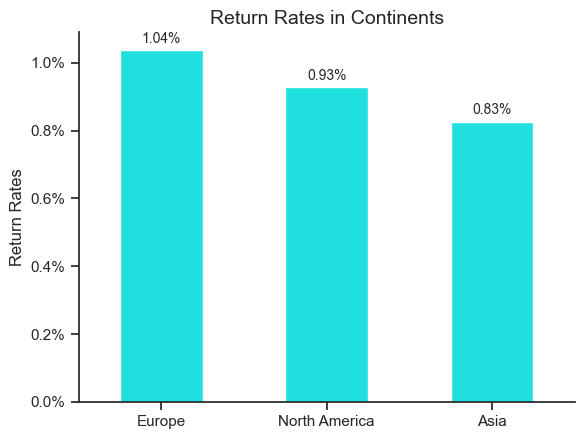

In [7]:
# Plotting return rates in Continents
sns.set_theme(style='ticks')
sns.barplot(
    data=df_return_continent,
    x='ContinentName',
    y='ReturnRates',
    width=0.5,
    color='cyan'
)
sns.despine()

# Formatting plot
plt.xlabel('')
plt.ylabel('Return Rates')
plt.title('Return Rates in Continents', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Labeling
for container in plt.gca().containers:
    plt.gca().bar_label(container, labels=[f'{x:.2f}%' for x in container.datavalues], padding=3, fontsize=10)

#### Return analysis in Countries

In [8]:
# Filtering data
df_return_country = df_origin[['Country','SalesQuantity','ReturnQuantity']].copy()

# Calculating sales quantity and return quantity and return rates
df_return_cal = df_return_country.groupby(['Country'])[['SalesQuantity','ReturnQuantity']].sum().reset_index()
df_return_cal['ReturnRates'] = (df_return_cal['ReturnQuantity'] / df_return_cal['SalesQuantity'])*100
df_return_rates_country = df_return_cal.sort_values(by='ReturnRates', ascending=False).head(10)
df_return_rates_country

,Country,SalesQuantity,ReturnQuantity,ReturnRates
18,Poland,88781,1024,1.153400
34,the Netherlands,82194,946,1.150936
25,Spain,87245,985,1.129005
8,Germany,826117,9316,1.127685
13,Italy,323965,3631,1.120800
20,Romania,83941,938,1.117452
26,Sweden,84798,938,1.106158
12,Ireland,83548,923,1.104754
9,Greece,86461,945,1.092978
23,Slovenia,84207,920,1.092546


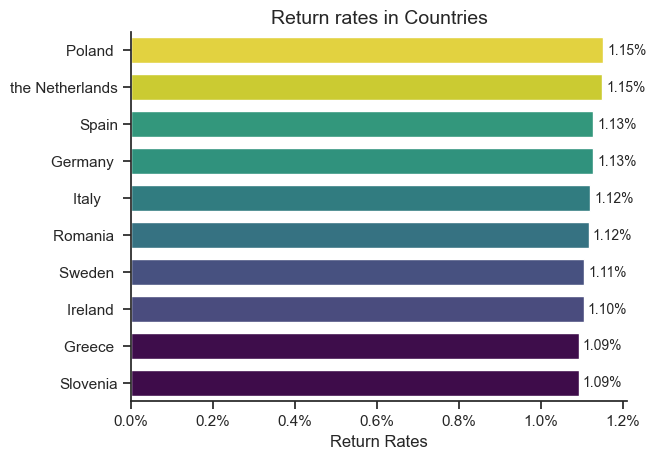

In [9]:
# Plotting return rates by city
sns.set_theme(style='ticks')
sns.barplot(
    data=df_return_rates_country,
    legend=False,
    x='ReturnRates',
    y='Country',
    hue='ReturnRates',
    palette='viridis',
    width=0.7
)
sns.despine()

# Formatting plot
plt.xlabel('Return Rates')
plt.ylabel('')
plt.title('Return rates in Countries', fontsize=14)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Labeling
for container in plt.gca().containers:
    plt.gca().bar_label(container, labels=[f'{x:.2f}%' for x in container.datavalues], padding=3, fontsize=10)

plt.show()